# Exercises 1.5 - Plotting
### Important Exercise 1: Plotting multiple datasets using for loops
You can combine for-loops and subplots to generate multi-panel plots.

You are given a variable, `datasets`, which is a list of list. Each list in `datasets` contains a dataset composed of 3 values.

Use a for loop to plot all three datasets in three subplots. All subplots should have the same y-limits. All subplots should have an y-axis label "Awesomeness" and an x-axis label "Shuffle factor". Each subplot should have a title "Dataset #" where "#" is substituted by the number of the dataset (1,2,3).

Roughly like so:

![](1.05_matplotlib_exercises1.png)

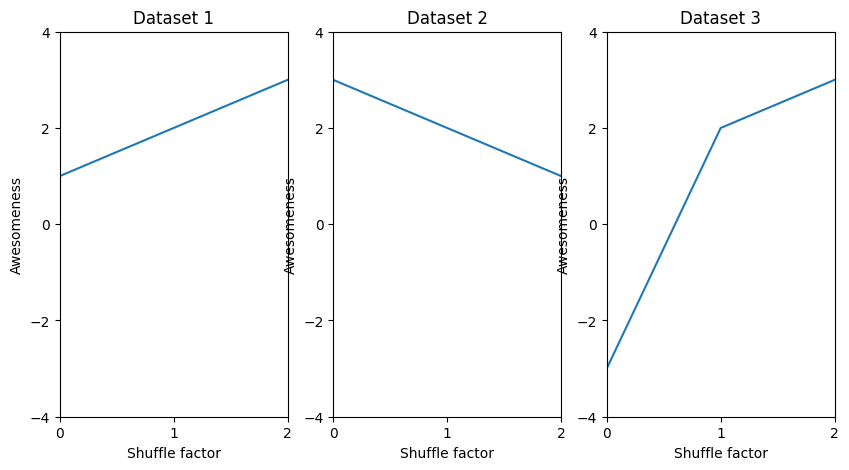

In [4]:
datasets = [[1,2,3], [3,2,1], [-3,2,3]]
import matplotlib.pyplot as plt
# your solution here


plt.figure(figsize=(10, 5))


for idx in range(len(datasets)):
    plt.subplot(1, len(datasets), idx+1)
    # data = datasets [idx]
    plt.plot(datasets [idx])
    plt.ylim(-4,4)
    plt.xlim(0,2)
    plt.ylabel('Awesomeness')
    plt.xlabel('Shuffle factor')
    plt.title('Dataset'+ ' ' + str(idx+1))
    plt.xticks([0, 1, 2])
    plt.yticks([-4,-2,0,2,4])


plt.show()

This is nice, but there are too many redundant labels. Copy your code generating the figure in the cell below and modify it in the following way:
- Only the first should have an y-axis label, "Awesomeness".
- Only the second (central) subplot should have an x-axis label "Shuffle factor".

Roughly like so:

![](1.05_matplotlib_exercises1b.png)

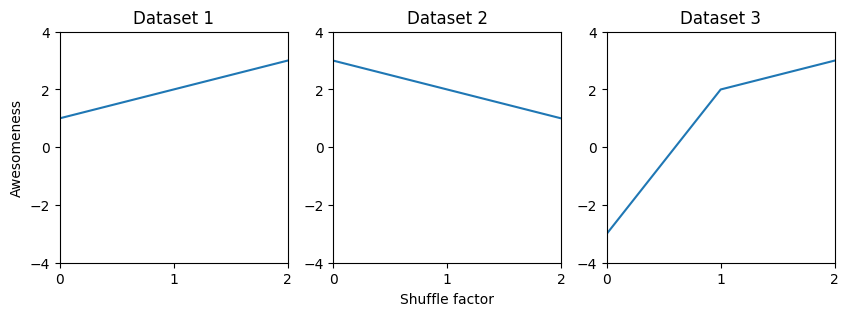

In [6]:
datasets = [[1,2,3], [3,2,1], [-3,2,3]]

# your solution here


plt.figure(figsize=(10, 3))


for idx in range(len(datasets)):
    plt.subplot (1, 3, idx + 1)
    newdata = datasets [idx]
    plt.plot(newdata)
    if idx == 0:
        plt.ylabel('Awesomeness')
    if idx == 1:
        plt.xlabel('Shuffle factor')
    plt.title('Dataset'+' ' + str(idx+1))
    plt.ylim(-4,4)
    plt.xlim(0,2)
    plt.xticks([0, 1, 2])
    plt.yticks([-4,-2,0,2,4])
    

plt.show()




### Exercise 2: Plot temperature anomaly values

Let's load some anomaly data:

In [7]:
# EXECUTE THIS CELL BUT DO NOT CHANGE IT
import numpy as np

# Load the full anomaly data set
data = np.loadtxt('temperature.csv', skiprows=1, delimiter=',')
years = [int(y) for y in data[:, 0]]  # unpack the table and cast years to int
temperature_anomalies = list(data[:, 1])  # unpack the table
print(years[:10])
print(temperature_anomalies[:10])

[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889]
[-0.1, -0.17, -0.11, -0.17, -0.28, -0.26, -0.27, -0.22, -0.09, -0.23]


In [8]:
print(years)
print(temperature_anomalies)

[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[-0.1, -0.17, -0.11, -0.17, -0.28, -0.26, -0.27, -0.22, -0.09, -0.23, -0.42, -0.15, -0.21, -0.22, -0.26, -0.16, -0.04, -0.05, -0.22, -0.04, -

Plot the anomaly values similar to the figure below, with a black line connecting the individual values.

Roughly like so:

![](1.05_matplotlib_exercises2.png)


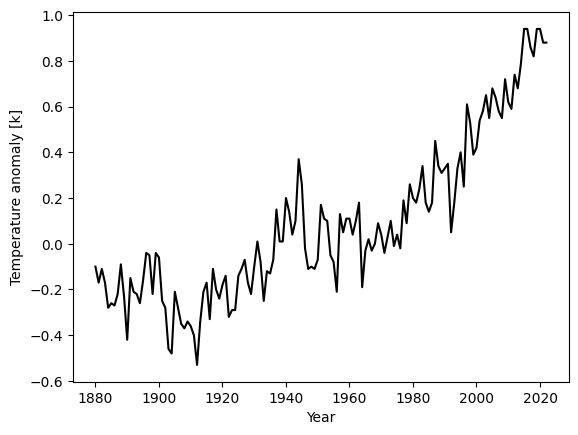

In [9]:
import matplotlib.pyplot as plt #setting the stage
plt.plot(years, temperature_anomalies, c='k')
plt.ylabel('Temperature anomaly [k]')
plt.xlabel('Year')

plt.show()

Now copy the code for plotting above to the next cell and modify it to show:
- a black line connecting individual values (as before)
- a red dot if the anomaly value is positive
- a horizontal red line at y=0

Roughly like so:

![](1.05_matplotlib_exercises2b.png)


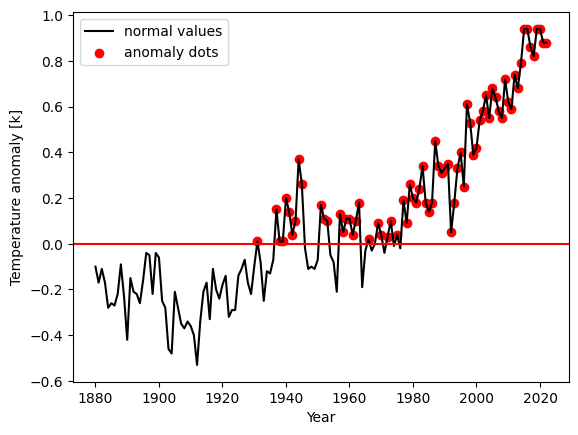

In [10]:
positive_years = []
positive_temperatures = []

plt.plot(years, temperature_anomalies,
         c='k',
         label= 'normal values')  # Black line connecting individual values

for i in range(len(years)):
    if temperature_anomalies[i] > 0:
        positive_years.append(years[i])
        positive_temperatures.append(temperature_anomalies[i])

plt.scatter(positive_years, positive_temperatures,
    c='r',
    label= 'anomaly dots')

plt.axhline(0,
            color='red',
            linestyle='-') # Horizontal red line at y=0
plt.legend()

plt.ylabel('Temperature anomaly [k]')
plt.xlabel('Year')

plt.show()

### Exercise 2: Plot the original and "downsampled" anomaly values
Downsample by computing the avg. anomaly value in blocks of 10 years. Each point in the plot is the average over ten years of anomaly data. The first green point is the average over years 1880-1890, the second point 1890-1900 etc. The original anomaly values are plotted as a grey line.

Save the figure to an image file in the png-format using `plt.savefig(FILENAME)`, where `FILENAME` is the name of the image file, for instance `my_amazing_figure.png`. Important: For the figure to be saved in the png-format, the filename needs to end in `.png`. You need to use `plt.savefig` in the same cell in which you generated the plot. But before calling `plt.show()`.

Roughly like so:

![](1.05_matplotlib_exercises3.png)


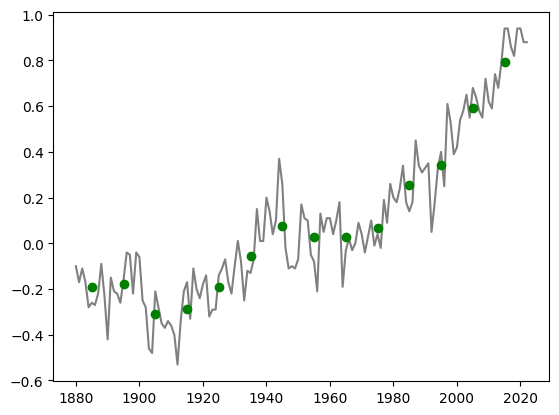

In [38]:
block = 10
dsa = []

for index in range(0,len(temperature_anomalies) - block+1,block):
    tmp= temperature_anomalies[index:index+block]
    m=np.mean(tmp)
    dsa.append(m)

plt.plot(years, temperature_anomalies, c='gray')
plt.plot(years[block//2::block], dsa, 'og')


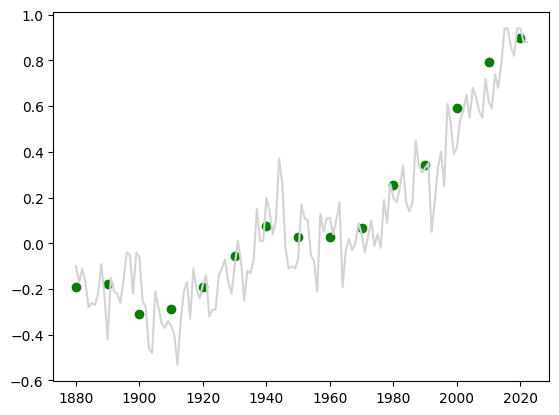

In [36]:
emptylist = []

for idx in range(len(temperature_anomalies[::10])):
    emptylist.append(np.mean(temperature_anomalies[idx*10:(idx+1)*10:]))

plt.plot(years, temperature_anomalies, c='lightgray')
plt.scatter(years[::10],emptylist, c='g')


In [152]:
'''
#avg_anomaly = np.mean(temperature_anomalies)



each_ten_year = [] #creates empty list for each ten year index
first_ten_temperature_average = [] #creates empty list for average temperature of indexed ten year
first_ten_year_average = [1880]
avg_anomaly_first_ten_list = []

#for eachten in range(len(years)):
#    each_ten_temperature_average.extend(temperature_anomalies[eachten::10])
#    each_ten_year.extend(years[eachten::10])

each_ten_year.extend(years[::10])
first_ten_temperature_average.extend(temperature_anomalies[:10:])

#avg_anomaly_first_ten = np.mean(temperature_anomalies[0,10])
avg_anomaly_first_ten = np.mean(first_ten_temperature_average)
avg_anomaly_first_ten_list.append(avg_anomaly_first_ten)

print (each_ten_year)
print (first_ten_temperature_average)
print(first_ten_year_average)
print(avg_anomaly_first_ten_list)

#1880-1890

Downsample by computing the avg. anomaly value in blocks of 10 years.
Each point in the plot is the average over ten years of anomaly data. 
The first green point is the average over years 1880-1890, the second point 1890-1900 etc.
The original anomaly values are plotted as a grey line.

# 14 dots
plt.plot(avg_anomaly_first_ten_list,first_ten_temperature_average), color='k'


plt.show()
'''

"\n#avg_anomaly = np.mean(temperature_anomalies)\n\n\n\neach_ten_year = [] #creates empty list for each ten year index\nfirst_ten_temperature_average = [] #creates empty list for average temperature of indexed ten year\nfirst_ten_year_average = [1880]\navg_anomaly_first_ten_list = []\n\n#for eachten in range(len(years)):\n#    each_ten_temperature_average.extend(temperature_anomalies[eachten::10])\n#    each_ten_year.extend(years[eachten::10])\n\neach_ten_year.extend(years[::10])\nfirst_ten_temperature_average.extend(temperature_anomalies[:10:])\n\n#avg_anomaly_first_ten = np.mean(temperature_anomalies[0,10])\navg_anomaly_first_ten = np.mean(first_ten_temperature_average)\navg_anomaly_first_ten_list.append(avg_anomaly_first_ten)\n\nprint (each_ten_year)\nprint (first_ten_temperature_average)\nprint(first_ten_year_average)\nprint(avg_anomaly_first_ten_list)\n\n#1880-1890\n\nDownsample by computing the avg. anomaly value in blocks of 10 years.\nEach point in the plot is the average over 

[-0.19, -0.22200000000000003, -0.22000000000000003, -0.22999999999999998, -0.23500000000000001, -0.233, -0.22300000000000003, -0.19999999999999998, -0.183, -0.196, -0.177, -0.14100000000000001, -0.15100000000000002, -0.15799999999999997, -0.182]
[1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


'\nfor each in range(len(temperature_anomalies[a+1:a+10:a+1])):\n    emptylist.append(np.mean(temperature_anomalies[:10:]))\n    a=a+1\n'

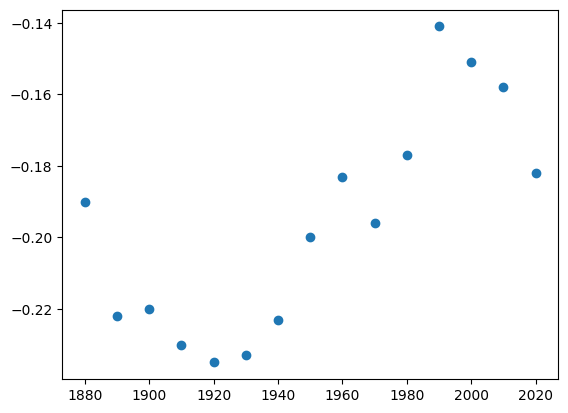

In [8]:
emptylist = []
one=1
zero=0
ten=10
for each in range(len(temperature_anomalies[::10])):
    #emptylist.append(np.mean(temperature_anomalies[zero:ten:1]))
    emptylist.append(np.mean(temperature_anomalies[each:each+10]))
    zero = zero + 10
    ten = zero + 10

newyears = []
newyears.extend(years[::10])
print(emptylist)
print(newyears)

plt.scatter(newyears,emptylist)



'''
for each in range(len(temperature_anomalies[a+1:a+10:a+1])):
    emptylist.append(np.mean(temperature_anomalies[:10:]))
    a=a+1
'''


In [9]:
firsttenyear=[-0.1, -0.17, -0.11, -0.17, -0.28, -0.26, -0.27, -0.22, -0.09, -0.23]
secondyear = [-0.42, -0.15, -0.21, -0.22, -0.26, -0.16, -0.04, -0.05, -0.22, -0.04]
thirdyear = [-0.06, -0.25, -0.28, -0.46, -0.48, -0.21, -0.28, -0.35, -0.37, -0.34] 
fourthyear = [-0.36, -0.40, -0.53, -0.34, -0.21, -0.17, -0.33, -0.11, -0.20, -0.24]
print(np.mean(firsttenyear))
print(np.mean(secondyear))
print(np.mean(thirdyear))
print(np.mean(fourthyear))

-0.19
-0.177
-0.308
-0.28900000000000003


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


c:\Users\naar3200\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\naar3200\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


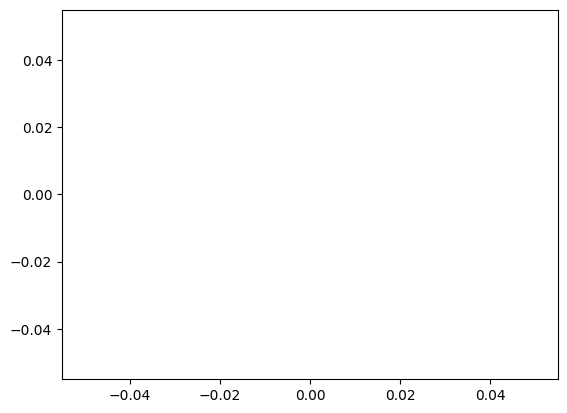

In [47]:

for each in range(len(years[::10])):
    #emptylist.append(np.mean(temperature_anomalies[zero:ten:1]))
    #meanssasa = np.mean(temperature_anomalies[each:each+10])
    plt.plot(np.mean(temperature_anomalies[x:idx]), 'ro')
    print(each)
    

In [36]:
range(len(years[::10]))

range(0, 15)

In [18]:
years[0]

1880

In [21]:
meanssasa

-0.182

In [22]:
years[each+5]


1899

In [23]:
years[-1
      ]

2022

In [26]:
temperature_anomalies[::10]


[-0.1,
 -0.42,
 -0.06,
 -0.36,
 -0.18,
 -0.1,
 0.2,
 -0.07,
 0.11,
 0.04,
 0.2,
 0.33,
 0.42,
 0.62,
 0.94]

In [38]:
each

1880

In [46]:
range(len(years[::10]))

range(0, 15)